Number of Principal Components: 10
Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


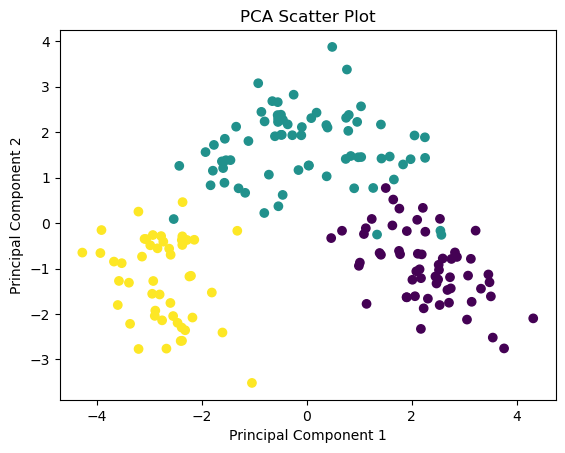

   Class  Cluster
0      1        0
1      1        0
2      1        0
3      1        0
4      1        0


In [1]:
# Step 1: Download the Wine dataset from the UCI Machine Learning Repository
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", 
                "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", 
                "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"]
data = pd.read_csv(url, names=column_names)

# Step 2: Load the dataset into a Pandas dataframe
df = pd.DataFrame(data)

# Step 3: Split the dataset into features and target variables
X = df.drop("Class", axis=1)
y = df["Class"]

# Step 4: Data preprocessing (scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Implement PCA on the preprocessed dataset using the scikit-learn library
from sklearn.decomposition import PCA

# Let's assume we want to retain 95% of the variance in the data
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Determine the optimal number of principal components to retain based on the explained variance ratio
print(f"Number of Principal Components: {pca.n_components_}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Step 7: Visualize the results of PCA using a scatter plot
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

# Step 8: Perform clustering on the PCA-transformed data using the K-Means clustering algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Step 9: Interpret the results of PCA and clustering analysis
# You can analyze the clustering results and compare them with the original target variable 'y'.

# Create a new dataframe to store the results
result_df = pd.DataFrame({'Class': y, 'Cluster': clusters})

# Print the first few rows to inspect the results
print(result_df.head())

# Generate a table showing the performance metrics for the clustering algorithm
# You can use metrics like Silhouette Score, Adjusted Rand Index, etc. to evaluate the clustering performance.

# Note: Depending on your specific analysis, you can perform further exploration and evaluation of the PCA and clustering results.

